In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sb

In [2]:
boston = pd.read_csv('data/boston.csv')
boston.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


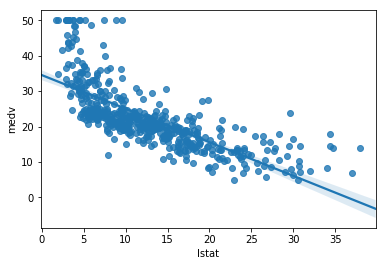

In [3]:
sb.regplot('lstat', 'medv', data=boston)

In [4]:
import statsmodels.formula.api as smf

In [5]:
from statsmodels.stats.anova import anova_lm

In [6]:
results = smf.ols('medv ~ lstat', data=boston).fit()

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 08 May 2019   Prob (F-statistic):           5.08e-88
Time:                        17:14:07   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

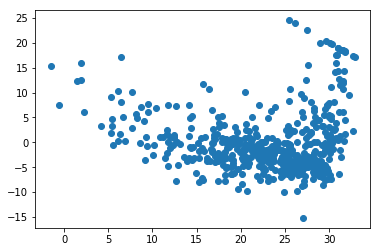

In [9]:
import matplotlib.pyplot as plt

plt.scatter(results.fittedvalues, results.resid)

In [10]:
stringify_columns = ' + '.join(boston.columns[:-1])

In [13]:
results = smf.ols('medv ~ {}'.format(stringify_columns), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 08 May 2019   Prob (F-statistic):          6.72e-135
Time:                        17:18:45   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
results = smf.ols('medv ~ {}'.format( ' + '.join(boston.columns[:-1].difference(boston['age']))), data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 08 May 2019   Prob (F-statistic):          6.72e-135
Time:                        17:28:12   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
age            0.0007      0.013      0.052      0.958      -0.025       0.027
black          0.0093      0.003      3.467      0.001       0.004       0.015
chas           2.6867      0.862      3.118      0.002       0.994       4.380
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
rad            0.3060      0.066      4.613      0.000       0.176       0.436
rm             3.8099      0.418      9.116      0.000       2.989       4.631
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
zn             0.0464      0.014      3.382      0.001       0.019       0.073
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Interaction
results = smf.ols('medv ~ lstat * age', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 08 May 2019   Prob (F-statistic):           4.86e-88
Time:                        17:28:37   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
from statsmodels.stats.anova import anova_lm

# Interaction
results = smf.ols('medv ~ lstat + np.power(lstat, 2)', data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 08 May 2019   Prob (F-statistic):          1.56e-112
Time:                        17:30:40   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy import stats

In [19]:
st, data, ss2 = summary_table(results, alpha=0.05)

In [28]:
predicted_value = data[:,2]
mean_stderror = data[:,3]
predicted_mean_low, predicted_mean_high = data[:,4:6].T
predicted_ci_low, predicted_ci_high = data[:,6:8].T

In [29]:
# wls cinv
prstd, iv_l, iv_u = wls_prediction_std(results)

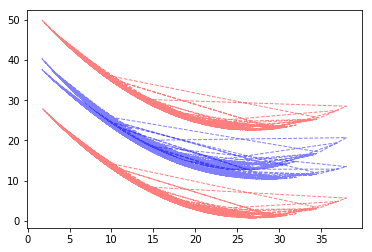

In [34]:
# plot OLS
cil, = plt.plot(boston['lstat'], predicted_ci_low, 'r--', lw=1, alpha=0.5)
ciu, = plt.plot(boston['lstat'], predicted_ci_high, 'r--', lw=1, alpha=0.5)
mcil, = plt.plot(boston['lstat'], predicted_mean_low, 'b--', lw=1, alpha=0.5)
mciu, = plt.plot(boston['lstat'], predicted_mean_high, 'b--', lw=1, alpha=0.5)

In [35]:
# create function to compute confidence or prediction interval given an x value
def create_interval(ols_result, interval_type, alpha, x_values, conf_x):
    if interval_type == 'confidence':
        add_one = 0
    elif interval_type == 'prediction':
        add_one = 1
    else:
        print("Choose interval_type as confidence or prediction")
        return
    n = len(x_values)
    t_value = stats.t.ppf(1 - alpha / 2, df = n - 2)
    sy = np.sqrt((ols_result.resid ** 2).sum() / (n - 2))
    numerator = (conf_x - x_values.mean()) ** 2
    denominator = ((x_values - x_values.mean()) ** 2).sum()
    interval = t_value * sy * np.sqrt(add_one + 1 / n + numerator / denominator)
    prediction = results.params[0] + results.params[1] * conf_x
    return (prediction - interval, prediction + interval)

In [36]:
create_interval(results, 'confidence', .05, boston['lstat'], 98)

(-191.5405290874784, -179.96839151959912)

In [37]:
create_interval(results, 'prediction', .05,  boston['lstat'], 98)

(-198.0434080263129, -173.46551258076462)

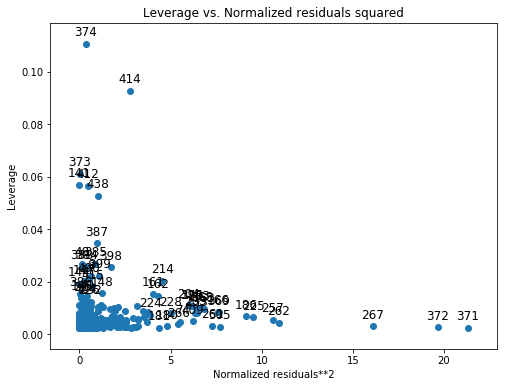

In [39]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

In [40]:
carseats = pd.read_csv('data/carseats.csv')
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [42]:
results = smf.ols('Sales ~ Income - Price + Education + Urban + US', data = carseats).fit()

In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     5.403
Date:                Wed, 08 May 2019   Prob (F-statistic):           0.000303
Time:                        18:54:17   Log-Likelihood:                -971.70
No. Observations:                 400   AIC:                             1953.
Df Residuals:                     395   BIC:                             1973.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5406      0.892      7.335      0.000       4.787       8.294
Urban[T.Yes]    -0.1817      0.304     -0.598      0.550      -0.779       0.415
US[T.Yes]        0.9650      0.291      3.316      0.001       0.393       1.537
Income           0.0138      0.005      2.771      0.006       0.004       0.024
Education       -0.0349      0.053     -0.657      0.511      -0.139       0.069
==============================================================================
Omnibus:                        1.724   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.422   Jarque-Bera (JB):                1.643
Skew:                           0.157   Prob(JB):                        0.440
Kurtosis:                       3.007   Cond. No.                         489.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# e) smaller model without urban
results = smf.ols('Sales ~ Price + US', data=carseats).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 08 May 2019   Prob (F-statistic):           2.66e-24
Time:                        18:55:34   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

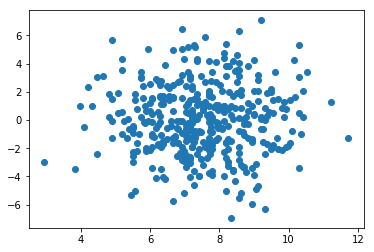

In [50]:
plt.scatter(results.fittedvalues, results.resid);

y = carseats['Sales']

In [52]:
# F-statistic and t-stat is same with an intercept
import statsmodels.api as sm

x = carseats['Price']
results = sm.OLS(y, sm.add_constant(x)).fit()
results.summary()

/Users/sahluwalia/sage/sage/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Wed, 08 May 2019   Prob (F-statistic):           7.62e-21
Time:                        18:59:14   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.000      12.398      14.886
Price         -0.0531      0.005     -9.912      0.000      -0.064      -0.043
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# The below prints the confindence interval for each predictor in a simple linear regression
# Nearly all the predictors have 95% confindence bands that don't include 0 meaning they rejecy the null hypothesis
# the only predictors that fails to reject null: chas 
for col in boston.columns[1:]:
    results = smf.ols('crim ~ {}'.format(col), data=boston).fit()
    print(results.conf_int())

                  0         1
Intercept  3.633993  5.273394
zn        -0.105556 -0.042314
                  0         1
Intercept -3.374634 -0.752851
indus      0.409530  0.610023
                  0         1
Intercept  2.966214  4.522679
chas      -4.851815  1.066261
                   0          1
Intercept -17.058819 -10.380946
nox        25.356076  37.140987
                   0          1
Intercept  13.871682  27.091926
rm         -3.729343  -1.638760
                  0         1
Intercept -5.632536 -1.923277
age        0.082763  0.132809
                  0          1
Intercept  8.064263  10.934260
dis       -1.881617  -1.220187
                  0         1
Intercept -3.158448 -1.415870
rad        0.550460  0.685362
                   0         1
Intercept -10.131175 -6.925563
tax         0.026113  0.033372
                   0          1
Intercept -23.830322 -11.463545
ptratio     0.819218   1.484748
                   0          1
Intercept  13.752084  19.354975
black      -

In [54]:
formula = 'crim ~ ' + ' + '.join(boston.columns[1:])
formula

'crim ~ zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat + medv'

In [56]:
results = smf.ols(formula, data=boston).fit()

In [57]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Wed, 08 May 2019   Prob (F-statistic):           1.57e-56
Time:                        19:03:29   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019       2.818      31.248
zn             0.0449      0.019      2.394      0.017       0.008       0.082
indus         -0.0639      0.083     -0.766      0.444      -0.228       0.100
chas          -0.7491      1.180     -0.635      0.526      -3.068       1.570
nox          -10.3135      5.276     -1.955      0.051     -20.679       0.052
rm             0.4301      0.613      0.702      0.483      -0.774       1.634
age            0.0015      0.018      0.081      0.935      -0.034       0.037
dis           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
rad            0.5882      0.088      6.680      0.000       0.415       0.761
tax           -0.0038      0.005     -0.733      0.464      -0.014       0.006
ptratio       -0.2711      0.186     -1.454      0.147      -0.637       0.095
black         -0.0075      0.004     -2.052      0.041      -0.015      -0.000
lstat          0.1262      0.076      1.667      0.096      -0.023       0.275
medv          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
results.tvalues[abs(results.tvalues) > 2]

Intercept    2.354313
zn           2.394312
dis         -3.502893
rad          6.680448
black       -2.051959
medv        -3.286517
dtype: float64

In [59]:
# Get all coefficients from multiple reression model
multiple_linear_params = results.params.iloc[1:]

simple_linear_params = pd.Series()
for col in boston.columns[1:]:
    results_slr = smf.ols('crim ~ {}'.format(col), data=boston).fit()
    simple_linear_params = simple_linear_params.append(results_slr.params.loc[[col]])
    
both_models = pd.DataFrame({'simple': simple_linear_params, 'multiple':multiple_linear_params})
both_models

,simple,multiple
zn,-0.073935,0.044855
indus,0.509776,-0.063855
chas,-1.892777,-0.749134
nox,31.248531,-10.313535
rm,-2.684051,0.430131
age,0.107786,0.001452
dis,-1.550902,-0.987176
rad,0.617911,0.588209
tax,0.029742,-0.003780
ptratio,1.151983,-0.271081


In [60]:
# there are several variables raised to the power of 2 or 3 that are showing significance
# but these need to be combined with other variables to assess their actual importance
for col in boston.columns[1:]:
    results = smf.ols('crim ~ {} + np.power({}, 2) + np.power({}, 3)'.format(col, col, col), data=boston).fit()
    print(results.conf_int())

                        0         1
Intercept        3.995365  5.696735
zn              -0.547929 -0.116448
np.power(zn, 2) -0.001103  0.014068
np.power(zn, 3) -0.000099  0.000024
                           0         1
Intercept           0.570162  6.754975
indus              -2.912179 -1.018247
np.power(indus, 2)  0.174681  0.329194
np.power(indus, 3) -0.008856 -0.005096
                          0         1
Intercept          2.966214  4.522679
chas              -1.617272  0.355420
np.power(chas, 2) -1.617272  0.355420
np.power(chas, 3) -1.617272  0.355420
                            0            1
Intercept          166.987961   299.185220
nox              -1614.151311  -944.591192
np.power(nox, 2)  1698.625715  2798.462391
np.power(nox, 3) -1538.996638  -952.409110
                          0           1
Intercept        -14.132472  239.381664
rm              -100.667850   22.367577
np.power(rm, 2)   -5.291984   14.393775
np.power(rm, 3)   -0.692661    0.343707
                    